# Notebook to debug Dyn_ACD_wtemp.py

The notebook to debug the Dyn_ACD algorithm. 

The algorithm in Dyn_ACD_wtemp.py

The latent variables at T=0 are drived separately from those at T>0.  

In this version of the algorithm, all the latent variables are static, exept w and ell, i.e., w(t), ell(t). 

In this version, the compuations for the initial time step is separated from other time steps. 

The dataset is divided to data0 and data_b1mAtm1At, which is equivalent to \hat{A}(t) in Dynamic_CRep. 
    

Synthetic data are store in the path: '../data/input/synthetic/'

In [67]:
import numpy as np
import pandas as pd

import Dyn_ACD_wtemp
from Dyn_ACD_wtemp import calculate_lambda_full
import tools_temp as tlm
import tools as tl
import cv_functions as cv
import matplotlib.pyplot as plt
import networkx as nx
import importlib
import sktensor as skt
from sklearn import metrics

%matplotlib notebook
%matplotlib inline

In [44]:
cmap = 'PuBuGn'

In [45]:
def flt(x,d=3):
    return round(x, d)

def unpack_filename(
        filename: str,
        sep: str = '_'
    ) -> pd.Series:
        list_str = filename.split(sep)
        columns = ['N','K','avg_degree','T','beta','pi','phi','rho_anomaly','rseed']
        assert len(columns) == len(list_str)
        return pd.Series(list_str, index = columns)
    
def pack_filename(
        N: int = 200,
        K: int = 5,
        avg_degree: float = 8.0,
        T: int = 20,
        beta: float = 0.2,
        pi: int = 2,
        phi: int = 2,
        rho_anomaly: float = 0.2,
        rseed: int = 0,
        sep: str = '_'
    ) -> pd.Series:
        list_str = [N,K,avg_degree,T,beta,pi,phi,rho_anomaly,rseed]
        filename = (sep).join(list_str)
        return filename

In [46]:
label = '100_2_5.0_5_0.2_2_2_0.2_0' 
stats = unpack_filename(label)
stats

N              100
K                2
avg_degree     5.0
T                5
beta           0.2
pi               2
phi              2
rho_anomaly    0.2
rseed            0
dtype: object

In [47]:
in_dir = f"../data/input/synthetic/{stats['N']}_{float(stats['avg_degree']):.0f}/"

In [48]:
theta = np.load(f"{in_dir}theta_{label}.npz",allow_pickle=True)

In [49]:
theta['z'].shape

(100, 100)

In [50]:
importlib.reload(tlm)

<module 'tools_temp' from '/Users/hasafdari/Downloads/WORK/GitHub/DynACD/code/tools_temp.py'>

In [51]:
network = f"{in_dir}syn_{label}.csv"
# network = '../data/input/'+label+'.dat'

A, B, B_T, data_T_vals = tlm.import_data(network,header=0, ego='source', alter='target', undirected=False, binary=False,sep=',')
nodes = A[0].nodes()
N = len(nodes)
K = int(str(label).split('_')[1])
T = int(str(label).split('_')[3])
print(N,K,T)

   source  target  weight_t0  weight_t1  weight_t2  weight_t3  weight_t4  \
0       0       5          1          1          1          1          1   
1       0       9          1          0          0          0          0   
2       0      20          1          1          1          1          1   
3       0      26          1          1          0          0          0   
4       0      36          1          1          0          0          0   

   weight_t5  
0          1  
1          0  
2          0  
3          0  
4          0  
../data/input/synthetic/100_5/syn_100_2_5.0_5_0.2_2_2_0.2_0.csv shape: (693, 8)
Number of nodes = 100
Number of layers = 6
Number of edges and average degree in each layer:
E[0] = 374 - <k> = 7.48
M[0] = 374 - <k_weighted> = 7.48
Reciprocity (networkX) = 0.086
Reciprocity (intended as the proportion of bi-directional edges over the unordered pairs) = 0.045
Reciprocity (considering the weights of the edges) = 0.086
E[1] = 375 - <k> = 7.5
M[1] = 375 -

In [52]:
(B[0]>0).sum()

374

### Initializing near ground truth

In [53]:
importlib.reload(tlm)  

<module 'tools_temp' from '/Users/hasafdari/Downloads/WORK/GitHub/DynACD/code/tools_temp.py'>

In [54]:
T = B.shape[0]-1 
# T = 2
B_train = B[:T]
B_aggr = B_train.sum(axis=0)[np.newaxis,:,:]
# B_train[B_train>1] = 1 
T_f = T-1
print(B_train.shape, B.shape, T_f, T)

(5, 100, 100) (6, 100, 100) 4 5


In [55]:
flag_anomaly = True 
rseed = 5
initialization = 3

In [70]:
Z = theta['z'] 

In [56]:
importlib.reload(Dyn_ACD_wtemp)

<module 'Dyn_ACD_wtemp' from '/Users/hasafdari/Downloads/WORK/GitHub/DynACD/code/Dyn_ACD_wtemp.py'>

T: 4
u, and v are initialized randomly; w is initialized using the input files:
../data/input/synthetic/100_5/theta_100_2_5.0_5_0.2_2_2_0.2_0.npz
Updating realization 0 ... 
Nreal = 0 - Loglikelihood = [-3871.33036628] - iterations = 331 - time = 3.87 seconds
u, and v are initialized randomly; w is initialized using the input files:
../data/input/synthetic/100_5/theta_100_2_5.0_5_0.2_2_2_0.2_0.npz
Updating realization 1 ... 
Nreal = 1 - Loglikelihood = [-3764.0045679] - iterations = 211 - time = 2.47 seconds
u, and v are initialized randomly; w is initialized using the input files:
../data/input/synthetic/100_5/theta_100_2_5.0_5_0.2_2_2_0.2_0.npz
Updating realization 2 ... 
Nreal = 2 - Loglikelihood = [-3764.13278555] - iterations = 191 - time = 2.3 seconds
u, and v are initialized randomly; w is initialized using the input files:
../data/input/synthetic/100_5/theta_100_2_5.0_5_0.2_2_2_0.2_0.npz
Updating realization 3 ... 
Nreal = 3 - Loglikelihood = [-3973.40515786] - iterations = 351

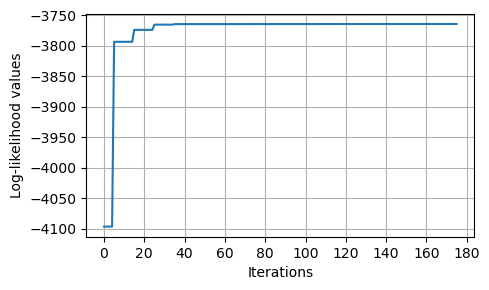


Inferred parameters saved in: ../data/output/theta_100_2_5.0_5_0.2_2_2_0.2_0_True.npz
To load: theta=np.load(filename), then e.g. theta["u"]
CPU times: user 14.8 s, sys: 136 ms, total: 15 s
Wall time: 15 s


In [57]:
%%time
rng = np.random.RandomState(rseed)
if initialization >= 4: 
    beta0  = theta['beta']
    phi0   = theta['phi']
    mupr0  = theta['mu']
    pibr0  = theta['pi']
    ell0   = theta['ell']    
else:  
    beta0  = rng.random_sample(1) 
    phi0   = rng.random_sample(1)
    mupr0  = rng.random_sample(1)
    pibr0  = rng.random_sample(1)
    ell0   = rng.random_sample(1) 
in_parameters = in_dir+'theta_'+label

model = Dyn_ACD_wtemp.Dyn_ACD_wtemp(K = K,N = N, plot_loglik=True,verbose =2,N_real= 5,
                         undirected=False,flag_anomaly = flag_anomaly,max_iter = 1000,
                         fix_mupr=False,fix_pibr = False,fix_phi = False,
                         beta0 = beta0, phi0 = phi0, mupr0=mupr0, pibr0=pibr0,ell0=ell0,
                         fix_beta=False,fix_ell=False,fix_communities=False,fix_w= True, 
                         initialization=initialization, out_inference = True,
                         in_parameters= in_parameters, 
                         end_file = label+'_' + str(flag_anomaly),constrained=False, ag=1.0,bg=1.,L=T_f)

u, v, w, beta, phi, ell, pi, mu,Loglikelihood = model.fit(data=B_train,T=T_f, nodes=nodes)

### Cosine Similarity as a measure for Community Detection:

In [72]:
u, cs_u = cv.cosine_similarity(model.u_f,theta['u'])
v, cs_v = cv.cosine_similarity(model.v_f,theta['v'])
cs_u,cs_v

(0.9956177972244104, 0.989939988121445)

### Eta and beta

In [73]:
print('\nInitial beta: {}'.format(theta['beta']),'Inferred beta: {}'.format(beta))
print('\nInitial phi: {}' .format(theta['phi']), 'Inferred phi: {}' .format(phi))
print('\nInitial ell: {}' .format(theta['ell']), 'Inferred ell: {}' .format(ell))
print('\nInitial pi:  {}' .format(pibr0),'Inferred pi: {}'  .format(pi))

print('\nInitial mu: {}' .format(mupr0),'Inferred mu: {}'.format(mu))

print(theta['beta'],theta['pi'],theta['phi'],theta['ell'])


Initial beta: 0.2 Inferred beta: [0.20929577]

Initial phi: 0.2 Inferred phi: 0.3332066591742633

Initial ell: 0.2 Inferred ell: 0.14166878095108523

Initial pi:  [0.91861091] Inferred pi: 0.363017669204525

Initial mu: [0.20671916] Inferred mu: 0.005922407006305642
0.2 0.2 0.2 0.2


### AUC 

In [74]:
importlib.reload(cv)
importlib.reload(tl)

<module 'tools' from '/Users/hasafdari/Downloads/WORK/GitHub/DynACD/code/tools.py'>

In [68]:
subs_nzp =  B[T_f].nonzero()
lambda_ij = calculate_lambda_full(u,v,w)

In [75]:
subs_nzp =  B[T_f].nonzero()
lambda_ij = calculate_lambda_full(model.u_f,model.v_f,model.w_f)

In [77]:
if T > 1:
    M0  = cv._lambda0_full(u,v,w[1:])  
    M00 = cv._lambda0_full(u,v,(w[0])[np.newaxis])  
else:
    M0  = cv._lambda0_full(u,v,w)  
    M00 = cv._lambda0_full(u,v,w)  
    print(M00.shape, M0.shape)
print(M0.shape, M00.shape)

(4, 100, 100) (1, 100, 100)


In [78]:
M = cv.calculate_conditional_expectation(M0[-1], beta=beta)
cv.calculate_AUC(M, B[T]), T, T_f

(0.7779248832190161, 5, 4)

In [79]:
Z = theta['z'] 
if Z.ndim > 2:
    Z_train = Z[:T]
    Z_aggr  = Z_train.sum(axis=0)[np.newaxis,:,:]
else:
    Z_train = np.copy(Z)
    Z_aggr = np.copy(Z)

In [80]:
importlib.reload(cv)

<module 'cv_functions' from '/Users/hasafdari/Downloads/WORK/GitHub/DynACD/code/cv_functions.py'>

In [81]:
T_f, Z_train.shape, Z.shape

(4, (100, 100), (100, 100))

In [304]:
importlib.reload(Dyn_ACD.cv_functions)
importlib.reload(Dyn_ACD.tools)

<module 'Dyn_ACD.tools' from '/Users/hsafdari/Documents/Dr_Caterina_de_Bacco/anomaly_detection/Dynamic_ACD/notebooks_syn/../Dyn_ACD/tools.py'>

In [82]:
if flag_anomaly:
    QIJ_dense = cv.QIJ_dense(B_train,(B[0])[np.newaxis,:,:],M0, M00, T_f, beta, phi, ell,pi, mu)
    print(QIJ_dense.shape)

(100, 100)


In [83]:
mask_B1 = B[0] > 0
for t in np.arange(1,B.shape[0]):
    mask_B1 = np.logical_or(mask_B1, B[t]>0)

mask_B0 = np.logical_not(mask_B1)    

In [87]:
if flag_anomaly:
    # mask_B1 = np.zeros(B[T_f].shape)
    # mask_B1[B[T_f] > 0] = 1 
    # mask_B0 = np.ones(B[T_f].shape)
    # mask_B0[B[T_f] > 0] = 0
    print('AUCZ (B==1): ', cv.calculate_AUC(QIJ_dense, Z,mask=mask_B1))
    print('AUCZ(B==0): ', cv.calculate_AUC(QIJ_dense, Z,mask=mask_B0))
    print('AUCZ (all): ', cv.calculate_AUC(QIJ_dense, Z,mask=None))


AUCZ (B==1):  0.7438538205980068
AUCZ(B==0):  0.6457725885619618
AUCZ (all):  0.7184211138142912


In [88]:
mask_Z = Z > 0

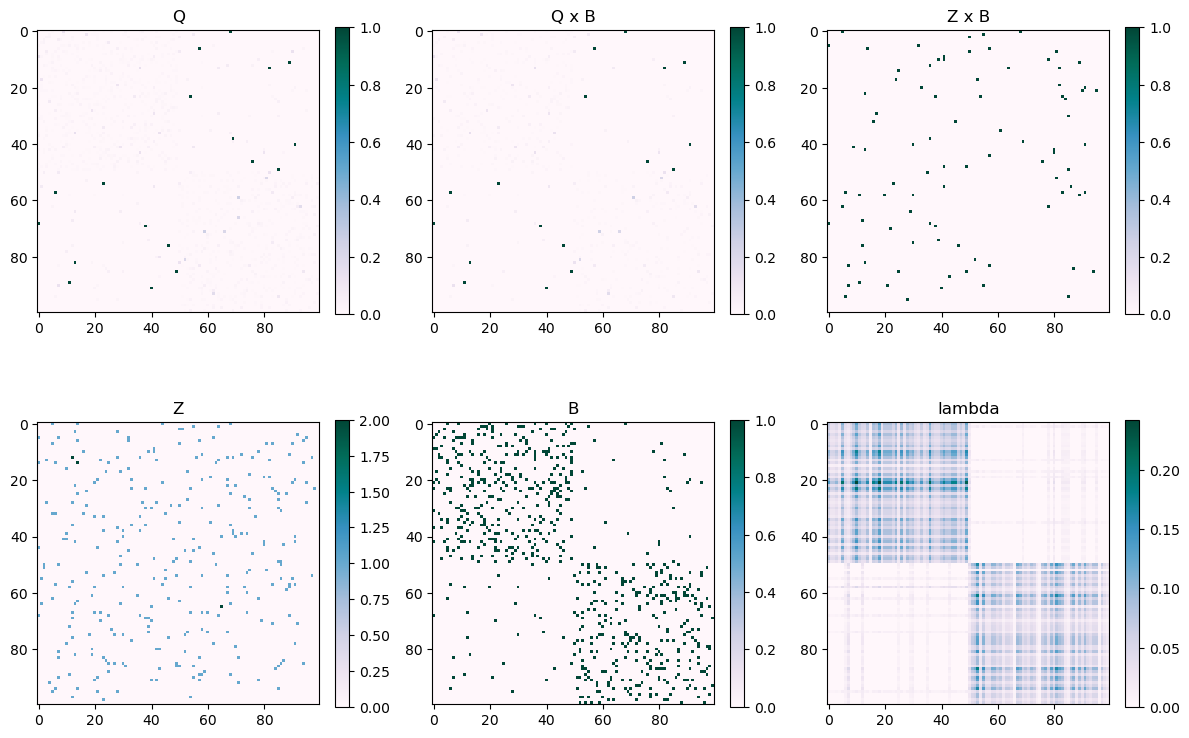

In [90]:
L = 3
n_rows = 2
if flag_anomaly:
    plt.figure(figsize=(12,8))
    
    plt.subplot(n_rows, L,1 )
    if T>1:
        plt.imshow(QIJ_dense, cmap=cmap, interpolation='nearest')
    else:
        plt.imshow(QIJ_dense[0], cmap=cmap, interpolation='nearest')
    # plt.imshow(B[0], cmap=cmap, interpolation='nearest')
    plt.colorbar(fraction=0.046)
    plt.title('Q')


    plt.subplot(n_rows, L, 2)
    if T>1: 
        plt.imshow((QIJ_dense*mask_B1), cmap=cmap, interpolation='nearest') #values of Q at entries of B
    else:
        plt.imshow((QIJ_dense*mask_B1)[0], cmap=cmap, interpolation='nearest') #values of Q at entries of B
    plt.colorbar(fraction=0.046)
    plt.title('Q x B') 
    
    plt.subplot(n_rows, L, 3) 
    plt.imshow(Z*mask_B1, cmap=cmap, interpolation='nearest') #values of Q at entries of B
    plt.colorbar(fraction=0.046)
    plt.title('Z x B') 
    
    plt.subplot(n_rows, L, 4) 
    plt.imshow(Z, cmap=cmap, interpolation='nearest') #values of Q at entries of B
    plt.colorbar(fraction=0.046)
    plt.title('Z') 
    
    plt.subplot(n_rows, L, 5) 
    plt.imshow(mask_B1, cmap=cmap, interpolation='nearest') #values of Q at entries of B
    plt.colorbar(fraction=0.046)
    plt.title('B') 
    
    plt.subplot(n_rows, L, 6) 
    plt.imshow(lambda_ij[-1], cmap=cmap, interpolation='nearest') #values of Q at entries of B
    plt.colorbar(fraction=0.046)
    plt.title('lambda') 

plt.tight_layout()
plt.show()

In [92]:
if T>1:
    if flag_anomaly: 
        M = cv.calculate_conditional_expectation_Q(M0[-1], QIJ_dense, beta=beta, phi=phi, ell=ell)
        M[subs_nzp] = (1-QIJ_dense)[subs_nzp] * (1 - beta) + QIJ_dense[subs_nzp] * (1 - phi)# to calculate AUC
    else:
        M = cv.calculate_conditional_expectation(M0[-1], beta=beta) 
        M[subs_nzp] = (1 - beta)# to calculate AUC
else:
    if flag_anomaly: 
        M = cv.calculate_conditional_expectation_Q(M0[-1], QIJ_dense[0], beta=1, phi=1, ell=float(ell)) 
    else:
        M = np.copy(M0[-1])

In [93]:
M.shape

(100, 100)

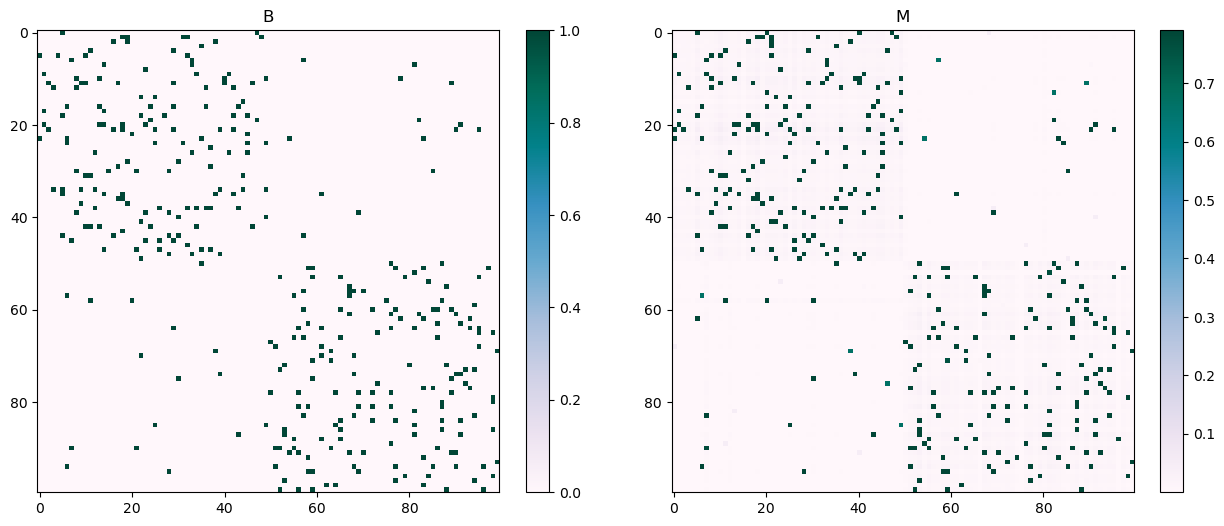

In [94]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.imshow(B[T], cmap=cmap, interpolation='nearest')
plt.colorbar(fraction=0.046)
plt.title('B')


plt.subplot(1, 2, 2) 
plt.imshow(M, cmap=cmap, interpolation='nearest') #values of Q at entries of B
plt.colorbar(fraction=0.046)
plt.title('M') 


plt.show()

### Communities

In [97]:
theta['u'].shape

(100, 2)

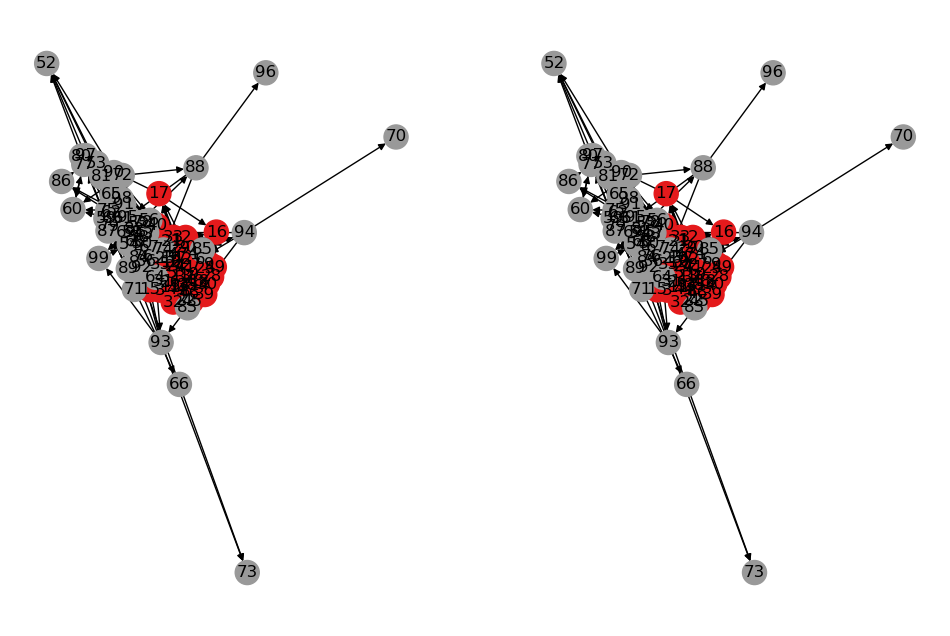

In [98]:
pos = nx.spring_layout(A[0], seed = 5) 
umax=np.argmax(theta['u'],1)#max of each u
nodelist = []
for k in range(K+1):
    nodelist.extend([i for i in range(N) if umax[i]==k])
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,8))
ax = axes.flatten()

nx.draw(A[0],pos=pos, with_labels=True,node_color = umax,cmap = plt.cm.Set1,ax=ax[0])
ax[0].set_axis_off()

umax=np.argmax(u,1)#max of each u
nodelist = []
for k in range(K+1):
    nodelist.extend([i for i in range(N) if umax[i]==k])
nx.draw(A[0],pos=pos, with_labels=True,node_color = umax,cmap = plt.cm.Set1,ax=ax[1])

plt.show()